In [1]:
import pandas as pd
import numpy as np

# Intro to pandas

## Type of data to read: excel, csv, json, sql

In [ ]:
# EXCEL 
df = pd.read_excel('file_path.xlsx')

# CSV 
df = pd.read_csv('file_path.csv')

# JSON
df = pd.read_json('file_path.json')

## Pandas read exploring: .head(), .info(), .describe()

In [6]:
import pandas as pd

data = {
    'Car Name': ['Toyota Corolla', 'Honda Civic', 'Ford Mustang', 'Chevrolet Camaro', 'Tesla Model 3', 'BMW X5', 'Audi A4'],
    'Price': [25000, 22000, 35000, 40000, 50000, 60000, 30000],
    'Is Broken': [False, True, True, False, True, False, False]
}

df_cars = pd.DataFrame(data)

In [7]:
df_cars.head()

,Car Name,Price,Is Broken
0,Toyota Corolla,25000,False
1,Honda Civic,22000,True
2,Ford Mustang,35000,True
3,Chevrolet Camaro,40000,False
4,Tesla Model 3,50000,True


In [8]:
df_cars.head(n=3)

,Car Name,Price,Is Broken
0,Toyota Corolla,25000,False
1,Honda Civic,22000,True
2,Ford Mustang,35000,True


In [9]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Car Name   7 non-null      object
 1   Price      7 non-null      int64 
 2   Is Broken  7 non-null      bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 251.0+ bytes


In [10]:
df_cars.describe()

,Price
count,7.000000
mean,37428.571429
std,13709.572603
min,22000.000000
25%,27500.000000
50%,35000.000000
75%,45000.000000
max,60000.000000


# Series

In [11]:
# From lists
ages_list = [21, 20, 25, 22]
names_list = ['Anna', 'Bob', 'Maria', 'Jack']

ages_series = pd.Series(data=ages_list, index=names_list, name='Age')
print(ages_series)


Anna     21
Bob      20
Maria    25
Jack     22
Name: Age, dtype: int64


In [22]:
# From dict
student_ages_dict = {'Anna': 21, 'Bob': 20, 'Maria': 25, 'Jack': 22}

ages_series = pd.Series(student_ages_dict, name='Ages')
print(ages_series)

Anna     21
Bob      20
Maria    25
Jack     22
Name: Ages, dtype: int64


In [13]:
# Change the index 
ages_series.index = ['A', 'B', 'M', 'J']
print(ages_series)

A    21
B    20
M    25
J    22
Name: Ages, dtype: int64


In [14]:
# Series are value-mutable
# Change the value from the index
ages_series['Jack'] = 23
print(ages_series)

A       21
B       20
M       25
J       22
Jack    23
Name: Ages, dtype: int64


In [15]:
ages_series.iloc[0] = 25
print(ages_series)

A       25
B       20
M       25
J       22
Jack    23
Name: Ages, dtype: int64


In [23]:
# Series are size immutable: once it's created, no elements 
# can be added ro removed from it without creating a new object
new_age_series = ages_series.drop(index='Maria')
print(ages_series, "\n")
print(new_age_series)  # Keeps unchanges

Anna     21
Bob      20
Maria    25
Jack     22
Name: Ages, dtype: int64 

Anna    21
Bob     20
Jack    22
Name: Ages, dtype: int64


In [24]:
# Asing/remove new value from the original uses the parameter: inplace=True
ages_series.drop(index="Jack", inplace=True)
print(ages_series)

Anna     21
Bob      20
Maria    25
Name: Ages, dtype: int64


In [25]:
ages_series["Jack"] = 30
print(ages_series)

Anna     21
Bob      20
Maria    25
Jack     30
Name: Ages, dtype: int64


In [26]:
new_recs = pd.Series({'Jon': 34, 'Peter': 23, 'Karo': 45, 'Abby': 25})
ages_series = pd.concat([ages_series, new_recs])
print(ages_series)

Anna     21
Bob      20
Maria    25
Jack     30
Jon      34
Peter    23
Karo     45
Abby     25
dtype: int64


# DataFrame

In [27]:
students_list = [['Anna', 'Smith', 21],
                 ['Bob', 'Jones', 20],
                 ['Maria', 'Williams', 25],
                 ['Jack', 'Brown', 22]]

In [28]:
students = pd.DataFrame(data=students_list, columns=['First Name', 'Family Name', 'Age'])
students

,First Name,Family Name,Age
0,Anna,Smith,21
1,Bob,Jones,20
2,Maria,Williams,25
3,Jack,Brown,22


In [29]:
students_number = [100, 200, 300, 400]
students = pd.DataFrame(students_list, 
                        columns = ['First Name', 'Family Name', 'Age'],
                        index = students_number)
students

,First Name,Family Name,Age
100,Anna,Smith,21
200,Bob,Jones,20
300,Maria,Williams,25
400,Jack,Brown,22


In [30]:
# Datafram from a nested dict: 
# This is a nested dictionary representing the students table
students_dict = {'First Name': {100: 'Anna', 
                                200: 'Bob', 
                                300: 'Maria',
                                400: 'Jack'},
                 
                 'Family Name': {100: 'Smith', 
                                 200: 'Jones',
                                 300: 'Williams',
                                 400: 'Brown'},
                 'Age': {100: 21, 
                         200: 20, 
                         300: 25,
                         400: 22}}

students = pd.DataFrame(students_dict)
students

,First Name,Family Name,Age
100,Anna,Smith,21
200,Bob,Jones,20
300,Maria,Williams,25
400,Jack,Brown,22


In [31]:
students.shape

(4, 3)

In [32]:
students.head()

,First Name,Family Name,Age
100,Anna,Smith,21
200,Bob,Jones,20
300,Maria,Williams,25
400,Jack,Brown,22


In [33]:
students[['First Name', 'Age']]

,First Name,Age
100,Anna,21
200,Bob,20
300,Maria,25
400,Jack,22


In [34]:
students['Age']

100    21
200    20
300    25
400    22
Name: Age, dtype: int64

In [35]:
type(students['Age'])

pandas.core.series.Series

In [36]:
students['Age'].to_numpy()

array([21, 20, 25, 22])

In [37]:
students[['Age', 'First Name']].to_numpy()

array([[21, 'Anna'],
       [20, 'Bob'],
       [25, 'Maria'],
       [22, 'Jack']], dtype=object)

In [38]:
students.head()

,First Name,Family Name,Age
100,Anna,Smith,21
200,Bob,Jones,20
300,Maria,Williams,25
400,Jack,Brown,22


In [39]:
students.tail(n=2)

,First Name,Family Name,Age
300,Maria,Williams,25
400,Jack,Brown,22


In [40]:
# Saving DataFrame to a file
students.to_csv('data/student_names.csv', sep='\t', columns = ['First Name', 'Family Name'], index=True)

# Accessing data in a DF

In [62]:
pets = {
    'species': ['cat', 'dog', 'parrot', 'cockroach'], 
    'name': ['Dr. Mittens Lamar', 'Diesel', 'Peach', 'Richard'], 
    'legs': [4, 4, 2, 6],
    'wings': [0, 0, 2, 4],
    'looking_for_home': ['no', 'no', 'no', 'yes']
}
df = pd.DataFrame(pets)
df.head()

,species,name,legs,wings,looking_for_home
0,cat,Dr. Mittens Lamar,4,0,no
1,dog,Diesel,4,0,no
2,parrot,Peach,2,2,no
3,cockroach,Richard,6,4,yes


In [42]:
df.axes

[RangeIndex(start=0, stop=4, step=1),
 Index(['species', 'name', 'legs', 'wings', 'looking_for_home'], dtype='object')]

In [43]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [44]:
df.axes[0]

RangeIndex(start=0, stop=4, step=1)

In [45]:
df.columns

Index(['species', 'name', 'legs', 'wings', 'looking_for_home'], dtype='object')

In [46]:
df.axes[1]

Index(['species', 'name', 'legs', 'wings', 'looking_for_home'], dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   species           4 non-null      object
 1   name              4 non-null      object
 2   legs              4 non-null      int64 
 3   wings             4 non-null      int64 
 4   looking_for_home  4 non-null      object
dtypes: int64(2), object(3)
memory usage: 292.0+ bytes


In [48]:
# Columns and index can be changed
df.columns = ['col', 'col2', 'col3', 'col4',  'col5']
df.head()

,col,col2,col3,col4,col5
0,cat,Dr. Mittens Lamar,4,0,no
1,dog,Diesel,4,0,no
2,parrot,Peach,2,2,no
3,cockroach,Richard,6,4,yes


In [49]:
df.index = ['row', 'row2', 'row3', 'row4']
df.head()

,col,col2,col3,col4,col5
row,cat,Dr. Mittens Lamar,4,0,no
row2,dog,Diesel,4,0,no
row3,parrot,Peach,2,2,no
row4,cockroach,Richard,6,4,yes


In [53]:
df.set_index('name', inplace=True)
df.head()

,species,legs,wings,looking_for_home
name,,,,
Dr. Mittens Lamar,cat,4,0,no
Diesel,dog,4,0,no
Peach,parrot,2,2,no
Richard,cockroach,6,4,yes


In [54]:
df.reset_index(inplace=True)
df.head()

,name,species,legs,wings,looking_for_home
0,Dr. Mittens Lamar,cat,4,0,no
1,Diesel,dog,4,0,no
2,Peach,parrot,2,2,no
3,Richard,cockroach,6,4,yes


In [63]:
# Renaming columns
df.rename(columns={'name': 'pet_name', 'looking_for_home': 'homeless'}, inplace=True)
df.head()

,species,pet_name,legs,wings,homeless
0,cat,Dr. Mittens Lamar,4,0,no
1,dog,Diesel,4,0,no
2,parrot,Peach,2,2,no
3,cockroach,Richard,6,4,yes


In [64]:
df.drop(columns='legs', inplace=True)
df.head()

,species,pet_name,wings,homeless
0,cat,Dr. Mittens Lamar,0,no
1,dog,Diesel,0,no
2,parrot,Peach,2,no
3,cockroach,Richard,4,yes


In [68]:
df.index = [4, 5, 6, 7]
df.head()

,species,pet_name,wings,homeless
4,cat,Dr. Mittens Lamar,0,no
5,dog,Diesel,0,no
6,parrot,Peach,2,no
7,cockroach,Richard,4,yes


In [69]:
df.reset_index(drop=True, inplace=True)
df.head()

,species,pet_name,wings,homeless
0,cat,Dr. Mittens Lamar,0,no
1,dog,Diesel,0,no
2,parrot,Peach,2,no
3,cockroach,Richard,4,yes


# Missing values

In [94]:
df = pd.read_csv('data/student-por.csv') 

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [96]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Excercise

In [105]:
df = pd.read_csv("data/ex_dataset.txt")

In [106]:
df.head()

,year,degree,age
0,2.0,M,22
1,1.0,M,27
2,3.0,M,20
3,1.0,NaN,22
4,NaN,M,22


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    11 non-null     float64
 1   degree  10 non-null     object 
 2   age     15 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 492.0+ bytes


In [108]:
df.isnull().any().sum()

np.int64(2)

In [109]:
df.isnull().sum()

year      4
degree    5
age       0
dtype: int64

## Sorting data in pandas

In [2]:
goods = {
    "type": ['PC', 'monitor', 'printer', 'notebook', 'PC'], 
    "price": [450, 150, 175, 600, 500],
    "quantity": [5, 2, 10, 15, 5],
    "vendor_code": ['135', '960', '004', '420', '114'], 
}
df = pd.DataFrame(goods)
df.head()

,type,price,quantity,vendor_code
0,PC,450,5,135
1,monitor,150,2,960
2,printer,175,10,004
3,notebook,600,15,420
4,PC,500,5,114


In [3]:
# Row sorting
df.set_index('vendor_code', inplace=True)
df.head()

,type,price,quantity
vendor_code,,,
135,PC,450,5
960,monitor,150,2
004,printer,175,10
420,notebook,600,15
114,PC,500,5


In [5]:
df.sort_index()

,type,price,quantity
vendor_code,,,
004,printer,175,10
114,PC,500,5
135,PC,450,5
420,notebook,600,15
960,monitor,150,2


In [9]:
df.sort_values('price', ascending=False)  # Single column

,type,price,quantity
vendor_code,,,
420,notebook,600,15
114,PC,500,5
135,PC,450,5
004,printer,175,10
960,monitor,150,2


In [11]:
df.sort_values(['quantity', 'price'], ascending=[True, False])  # Multiple cols

,type,price,quantity
vendor_code,,,
960,monitor,150,2
114,PC,500,5
135,PC,450,5
004,printer,175,10
420,notebook,600,15


### Column sorting

In [17]:
df = df.reindex(sorted(df.columns, reverse=True), axis='columns')
df

,type,quantity,price
vendor_code,,,
135,PC,5,450
960,monitor,2,150
004,printer,10,175
420,notebook,15,600
114,PC,5,500


## Modifying a DF

In [29]:
pets = {
    'species': ['cat', 'dog', 'parrot', 'cockroach'], 
    'pet_name': ['Dr. Mittens Lamar', 'Diesel', 'Peach', 'Richard'], 
    'legs': [4, 4, 2, 6],
    'wings': [0, 0, 2, 4],
    'homeless': ['no', 'no', 'no', 'yes']
}
df = pd.DataFrame(pets)
df.head()

,species,pet_name,legs,wings,homeless
0,cat,Dr. Mittens Lamar,4,0,no
1,dog,Diesel,4,0,no
2,parrot,Peach,2,2,no
3,cockroach,Richard,6,4,yes


### Adding cols

In [30]:
df['mood'] = ['sleepy', 'happy', 'thinking', 'excited']
df.head()

,species,pet_name,legs,wings,homeless,mood
0,cat,Dr. Mittens Lamar,4,0,no,sleepy
1,dog,Diesel,4,0,no,happy
2,parrot,Peach,2,2,no,thinking
3,cockroach,Richard,6,4,yes,excited


In [31]:
df['pairs_of_legs'] = df['legs'] // 2
df.head()

,species,pet_name,legs,wings,homeless,mood,pairs_of_legs
0,cat,Dr. Mittens Lamar,4,0,no,sleepy,2
1,dog,Diesel,4,0,no,happy,2
2,parrot,Peach,2,2,no,thinking,1
3,cockroach,Richard,6,4,yes,excited,3


In [32]:
df['description'] = df['mood'] + ' ' + df['species']
df.head()

,species,pet_name,legs,wings,homeless,mood,pairs_of_legs,description
0,cat,Dr. Mittens Lamar,4,0,no,sleepy,2,sleepy cat
1,dog,Diesel,4,0,no,happy,2,happy dog
2,parrot,Peach,2,2,no,thinking,1,thinking parrot
3,cockroach,Richard,6,4,yes,excited,3,excited cockroach


### Adding rows

In [33]:
new_row = {'pet_name': 'Turtle', 
            'species': 'turtle',
            'legs': 4,
            'wings': 0,
            'homeless': 'no',
            'mood': 'skeptical',
            'pairs_of_legs': 2,
            'description': 'skeptical turtle'}
df = pd.concat([df, pd.DataFrame.from_records([new_row])], ignore_index=True)
df

,species,pet_name,legs,wings,homeless,mood,pairs_of_legs,description
0,cat,Dr. Mittens Lamar,4,0,no,sleepy,2,sleepy cat
1,dog,Diesel,4,0,no,happy,2,happy dog
2,parrot,Peach,2,2,no,thinking,1,thinking parrot
3,cockroach,Richard,6,4,yes,excited,3,excited cockroach
4,turtle,Turtle,4,0,no,skeptical,2,skeptical turtle


### Deleting cols

In [34]:
df.drop(columns=['species', 'mood'], inplace=True)
df.head()

,pet_name,legs,wings,homeless,pairs_of_legs,description
0,Dr. Mittens Lamar,4,0,no,2,sleepy cat
1,Diesel,4,0,no,2,happy dog
2,Peach,2,2,no,1,thinking parrot
3,Richard,6,4,yes,3,excited cockroach
4,Turtle,4,0,no,2,skeptical turtle


### Deleting rows

In [35]:
df.drop(index=3, inplace=True)
df.head()

,pet_name,legs,wings,homeless,pairs_of_legs,description
0,Dr. Mittens Lamar,4,0,no,2,sleepy cat
1,Diesel,4,0,no,2,happy dog
2,Peach,2,2,no,1,thinking parrot
4,Turtle,4,0,no,2,skeptical turtle


# Combining Data in Pandas

In [2]:
junior_class = pd.DataFrame({'Name': ['Ann', 'Kate', 'George', 'Eric'],
                             '100m (sec.)': ['16.3', '17.1', '14.8', '14.3'],
                             '2km (min., sec.)': ['9,24', '9,45', '9,17', '8,14']},
                            index=[1, 2, 3, 4])
senior_class = pd.DataFrame({'Name': ['Jack', 'Alicia', 'Ella', 'James'],
                             '100m (sec.)': ['15.9', '17.8', '17.0', '15.0'],
                             '2km (min., sec.)': ['8,18', '9,02', '8,58', '7,58']})

In [3]:
junior_class

,Name,100m (sec.),"2km (min., sec.)"
1,Ann,16.3,"9,24"
2,Kate,17.1,"9,45"
3,George,14.8,"9,17"
4,Eric,14.3,"8,14"


In [4]:
senior_class

,Name,100m (sec.),"2km (min., sec.)"
0,Jack,15.9,"8,18"
1,Alicia,17.8,"9,02"
2,Ella,17.0,"8,58"
3,James,15.0,"7,58"


In [5]:
pd.concat([junior_class, senior_class])

,Name,100m (sec.),"2km (min., sec.)"
1,Ann,16.3,"9,24"
2,Kate,17.1,"9,45"
3,George,14.8,"9,17"
4,Eric,14.3,"8,14"
0,Jack,15.9,"8,18"
1,Alicia,17.8,"9,02"
2,Ella,17.0,"8,58"
3,James,15.0,"7,58"


In [9]:
pd.concat([junior_class, senior_class], axis=1)  # axis=1 for side to side concatenation
# Nan Values are produced because of no coincidence on indexes

,Name,100m (sec.),"2km (min., sec.)",Name,100m (sec.),"2km (min., sec.)"
1,Ann,16.3,"9,24",Alicia,17.8,"9,02"
2,Kate,17.1,"9,45",Ella,17.0,"8,58"
3,George,14.8,"9,17",James,15.0,"7,58"
4,Eric,14.3,"8,14",NaN,NaN,NaN
0,NaN,NaN,NaN,Jack,15.9,"8,18"


In [12]:
pd.concat([junior_class, senior_class],
           ignore_index=True)  # ignore_index — keeping or resetting the original indexes when concatenating

,Name,100m (sec.),"2km (min., sec.)"
0,Ann,16.3,"9,24"
1,Kate,17.1,"9,45"
2,George,14.8,"9,17"
3,Eric,14.3,"8,14"
4,Jack,15.9,"8,18"
5,Alicia,17.8,"9,02"
6,Ella,17.0,"8,58"
7,James,15.0,"7,58"


In [ ]:
pd.concat([junior_class, senior_class], axis=1, join='inner')
# Inner joining based on the index coincidences

,Name,100m (sec.),"2km (min., sec.)",Name,100m (sec.),"2km (min., sec.)"
1,Ann,16.3,"9,24",Alicia,17.8,"9,02"
2,Kate,17.1,"9,45",Ella,17.0,"8,58"
3,George,14.8,"9,17",James,15.0,"7,58"


In [14]:
pd.concat([junior_class, senior_class],
          keys=['Jun. class', 'Sen. class'])  # keys — adding a new level of labels 


Name 100m (sec.) 2km (min., sec.)
Jun. class 1     Ann        16.3             9,24
           2    Kate        17.1             9,45
           3  George        14.8             9,17
           4    Eric        14.3             8,14
Sen. class 0    Jack        15.9             8,18
           1  Alicia        17.8             9,02
           2    Ella        17.0             8,58
           3   James        15.0             7,58

## Merging objets

In [15]:
age_of_participants = pd.DataFrame({'Name': ['Ann', 'Eric', 'Ella'],
                                    'Age': ['16', '16', '18']})

In [16]:
junior_class.merge(age_of_participants)

,Name,100m (sec.),"2km (min., sec.)",Age
0,Ann,16.3,"9,24",16
1,Eric,14.3,"8,14",16


In [18]:
junior_class.merge(age_of_participants, how='left') # how — defines the way of merging. Possible values are 'inner', 'outer', 'left', and 'right' (default 'inner').

,Name,100m (sec.),"2km (min., sec.)",Age
0,Ann,16.3,"9,24",16
1,Kate,17.1,"9,45",NaN
2,George,14.8,"9,17",NaN
3,Eric,14.3,"8,14",16


In [19]:
junior_class.merge(age_of_participants, how='right')

,Name,100m (sec.),"2km (min., sec.)",Age
0,Ann,16.3,"9,24",16
1,Eric,14.3,"8,14",16
2,Ella,NaN,NaN,18


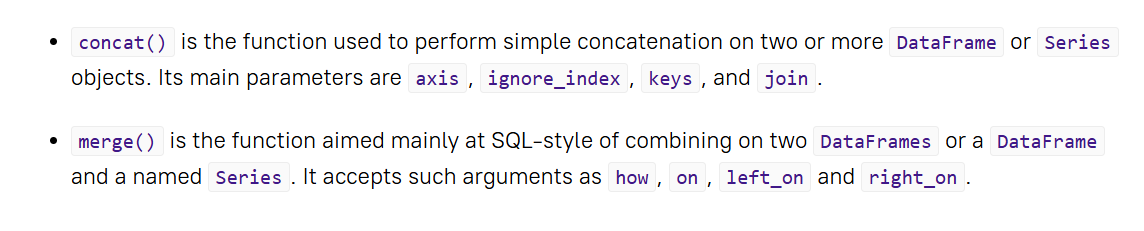

In [20]:
keyboard_instruments = pd.DataFrame({'cat_id': ['001', '002', '003'],
                                     'Instrument': ['Acoustic piano', 'Electric piano', 'Synthesizer'],
                                     'Average price': ['$10,000', '$5,000', '$1,200']},
                                    index=[1, 2, 3])

string_instruments = pd.DataFrame({'cat_id': ['004', '005', '006'],
                                   'Instrument': ['Acoustic guitar', 'Cello', 'Violin'],
                                   'Average price': ['$2,000', '$1,500', '$2,000']},
                                  index=[1, 2, 3])

In [25]:
pd.concat([keyboard_instruments, string_instruments], ignore_index=True)

,cat_id,Instrument,Average price
0,001,Acoustic piano,"$10,000"
1,002,Electric piano,"$5,000"
2,003,Synthesizer,"$1,200"
3,004,Acoustic guitar,"$2,000"
4,005,Cello,"$1,500"
5,006,Violin,"$2,000"


In [26]:
grades_2019 = pd.DataFrame({'Subject': ['Physics', 'Geometry', 'Chemistry'], 'Average': ['68', '78', '75']})
grades_2020 = pd.DataFrame({'Subject': ['Physics', 'Geometry', 'Chemistry'], 'Average': ['72', '80', '75']})

In [27]:
grades_2019

,Subject,Average
0,Physics,68
1,Geometry,78
2,Chemistry,75


In [28]:
grades_2020

,Subject,Average
0,Physics,72
1,Geometry,80
2,Chemistry,75


In [33]:
pd.concat([grades_2019, grades_2020], keys=('Year 2019', 'Year 2020'))

Subject Average
Year 2019 0    Physics      68
          1   Geometry      78
          2  Chemistry      75
Year 2020 0    Physics      72
          1   Geometry      80
          2  Chemistry      75